In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load preprocessed data
df = pd.read_csv("cleaned_reviews.csv")

# Ensure date is parsed
df["date"] = pd.to_datetime(df["date"], errors="coerce")

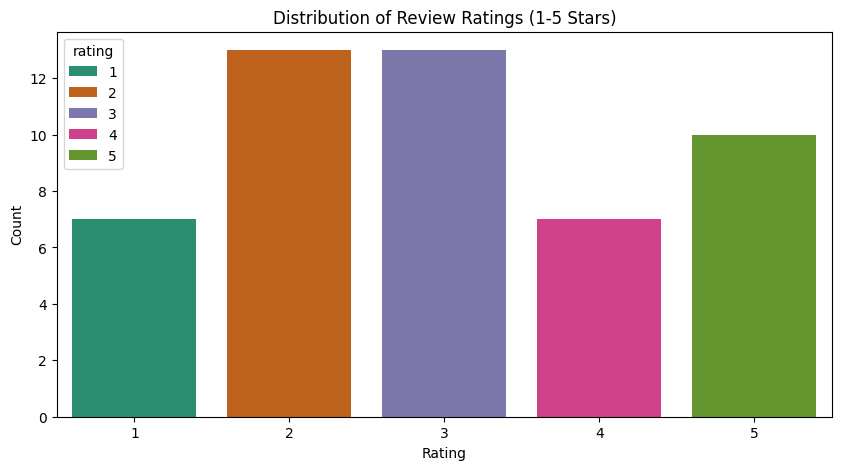

In [17]:
# 1. Distribution of Review Ratings
plt.figure(figsize=(10,5))
sns.countplot(x="rating", data=df, hue='rating', palette="Dark2")
plt.title("Distribution of Review Ratings (1-5 Stars)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

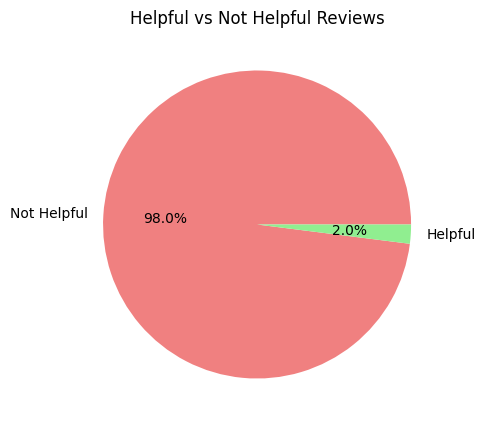

In [30]:
# 2. Helpful Reviews
plt.figure(figsize=(5,5))
df["helpful_flag"].value_counts().plot.pie(
    autopct="%1.1f%%", labels=["Not Helpful","Helpful"], colors=["lightcoral","lightgreen"]
)
plt.title("Helpful vs Not Helpful Reviews")
plt.ylabel("")
plt.show()

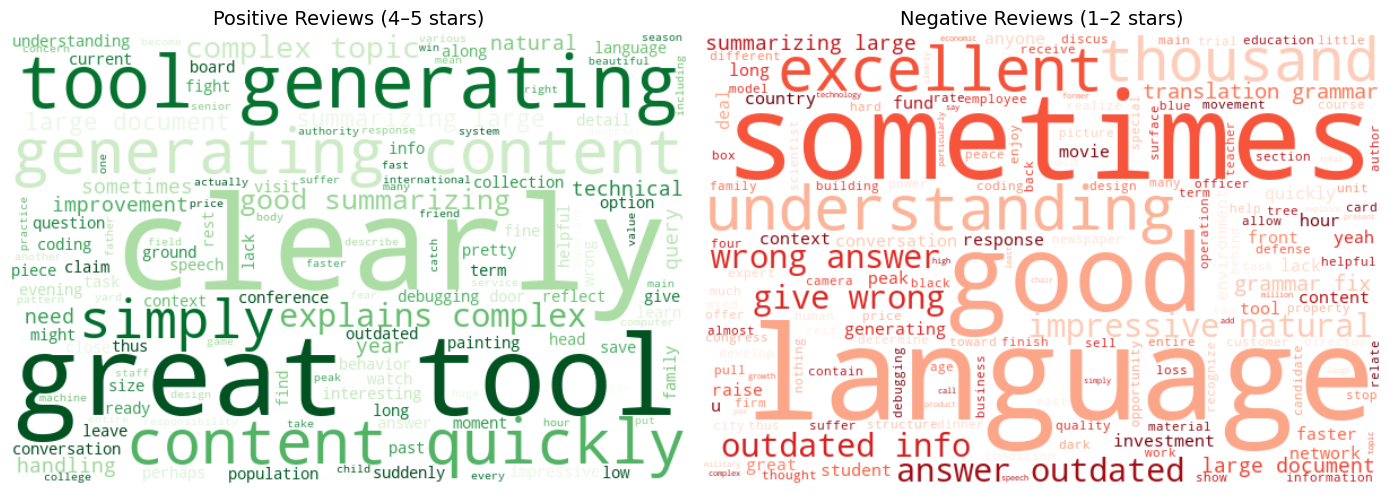

In [34]:
# 3. Common Keywords in Positive vs Negative Reviews
pos_text = " ".join(df[df["rating"] >= 4]["clean_review"])
neg_text = " ".join(df[df["rating"] <= 2]["clean_review"])

# Create word clouds
plt.figure(figsize=(14, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews (4–5 stars)", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()

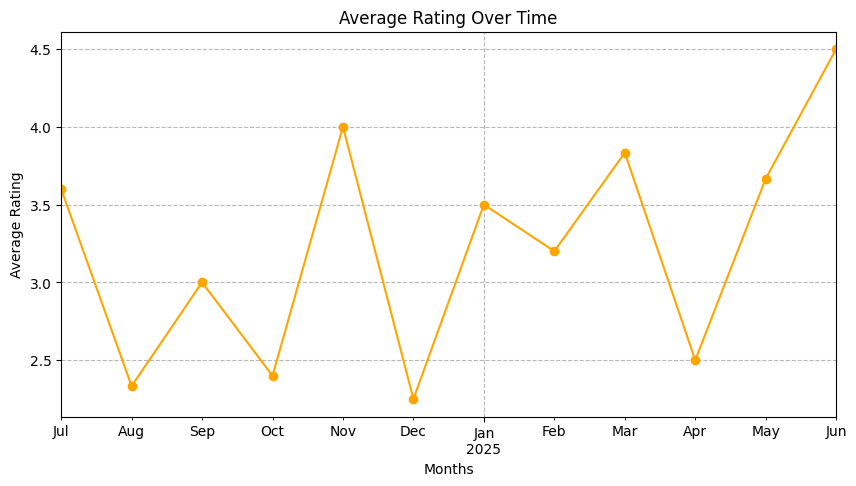

In [47]:
# 4. Average Rating Over Time
avg_rating_time = df.groupby(df["date"].dt.to_period("M"))["rating"].mean()
avg_rating_time.plot(kind="line", figsize=(10,5), marker="o", color="orange")
plt.title("Average Rating Over Time")
plt.xlabel("Months")
plt.ylabel("Average Rating")
plt.grid(True, linestyle="--", alpha=0.9)
plt.show()

C:\Users\This PC\AppData\Local\Temp\ipykernel_7308\956593536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="location", y="rating", data=df[df["location"].isin(top_countries)], palette="coolwarm")


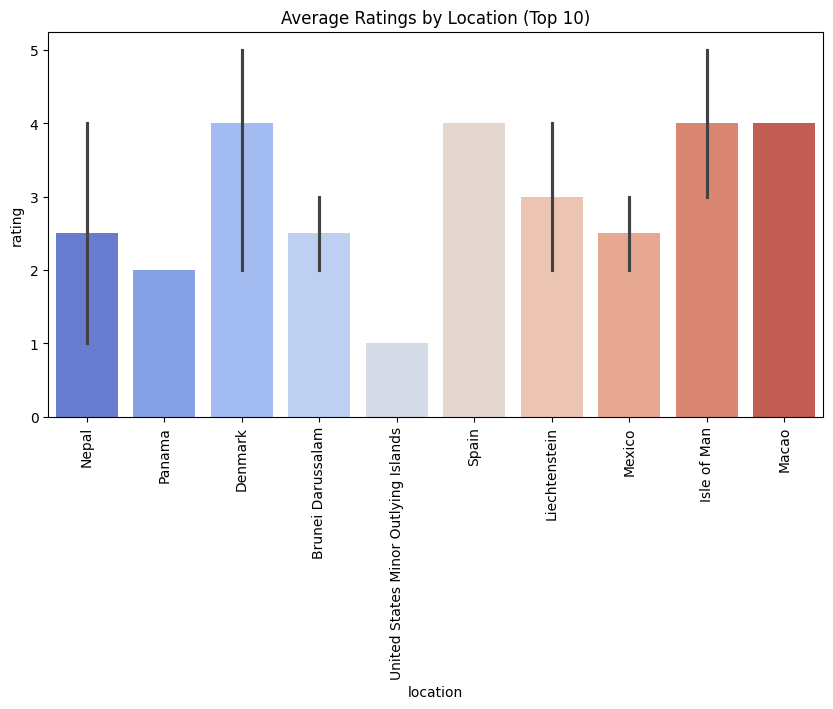

In [57]:
# 5. Ratings by Location (Top 10)
plt.figure(figsize=(10,5))
top_countries = df["location"].value_counts().head(10).index

sns.barplot(x="location", y="rating", data=df[df["location"].isin(top_countries)], palette="coolwarm")
plt.title("Average Ratings by Location (Top 10)")
plt.xticks(rotation=90)
plt.show()

C:\Users\This PC\AppData\Local\Temp\ipykernel_7308\2990257321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="platform", y="rating", data=df, palette="muted")


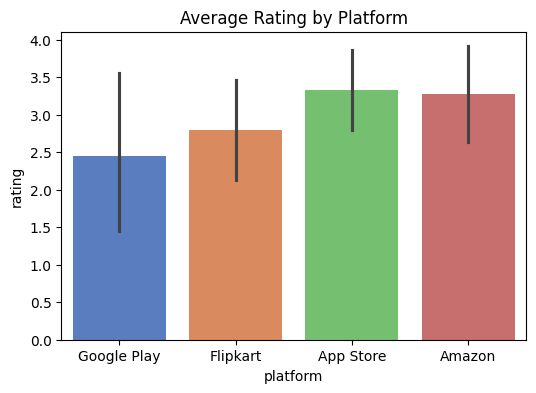

In [60]:
# 6. Ratings by Platform
plt.figure(figsize=(6,4))
sns.barplot(x="platform", y="rating", data=df, palette="muted")
plt.title("Average Rating by Platform")
plt.show()

C:\Users\This PC\AppData\Local\Temp\ipykernel_7308\3108634275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="verified_flag", y="rating", data=df, palette="Set1")


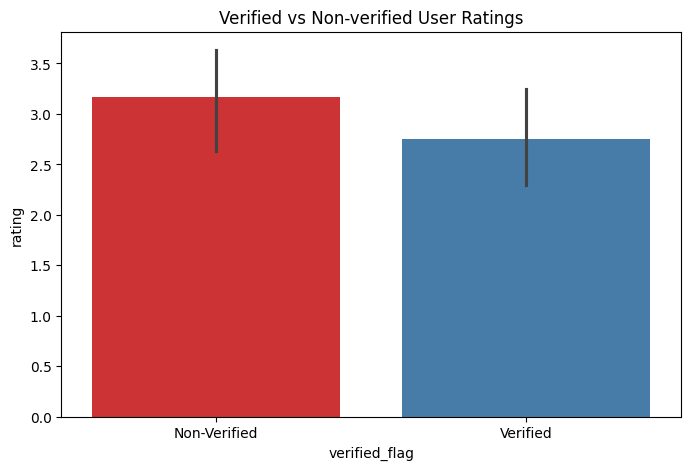

In [62]:
# 7. Verified vs Non-verified Users
plt.figure(figsize=(8,5))
sns.barplot(x="verified_flag", y="rating", data=df, palette="Set1")
plt.title("Verified vs Non-verified User Ratings")
plt.xticks([0,1], ["Non-Verified","Verified"])
plt.show()

C:\Users\This PC\AppData\Local\Temp\ipykernel_7308\4092064489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=df, palette='coolwarm')


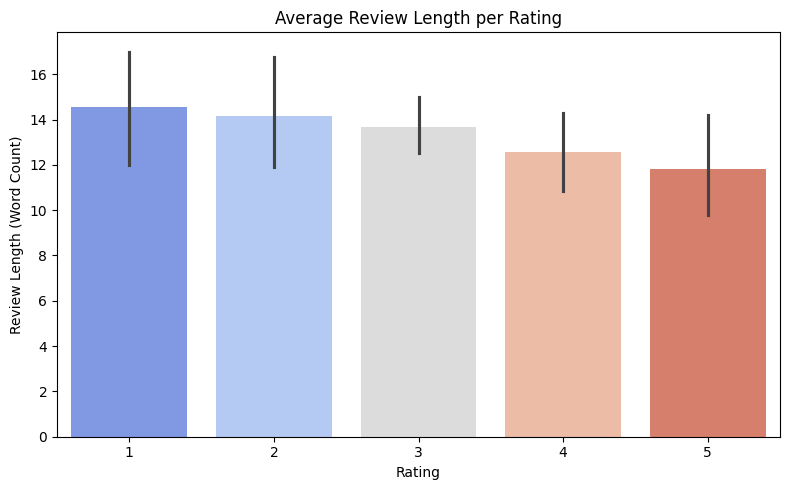

In [65]:
# 8. Average Review Length per Rating Category
plt.figure(figsize=(8, 5))
sns.barplot(x='rating', y='review_length', data=df, palette='coolwarm')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.tight_layout()
plt.show()

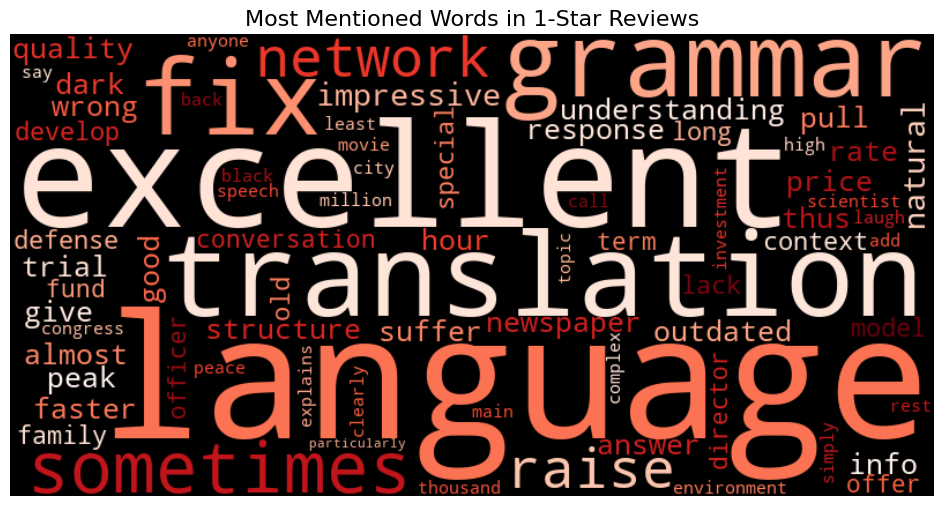

In [67]:
# 9. Most Mentioned Words in 1-Star Reviews
from wordcloud import WordCloud

# Collect words from 1-star reviews
one_star_text = " ".join(df[df["rating"]==1]["clean_review"])

# Generate word cloud
wc = WordCloud(
    width=800, 
    height=400, 
    background_color="black", 
    colormap="Reds", 
    max_words=100
).generate(one_star_text)

# Plot word cloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Words in 1-Star Reviews", fontsize=16)
plt.show()


C:\Users\This PC\AppData\Local\Temp\ipykernel_7308\2710067180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="version", x="rating", data=version_avg, palette="viridis")


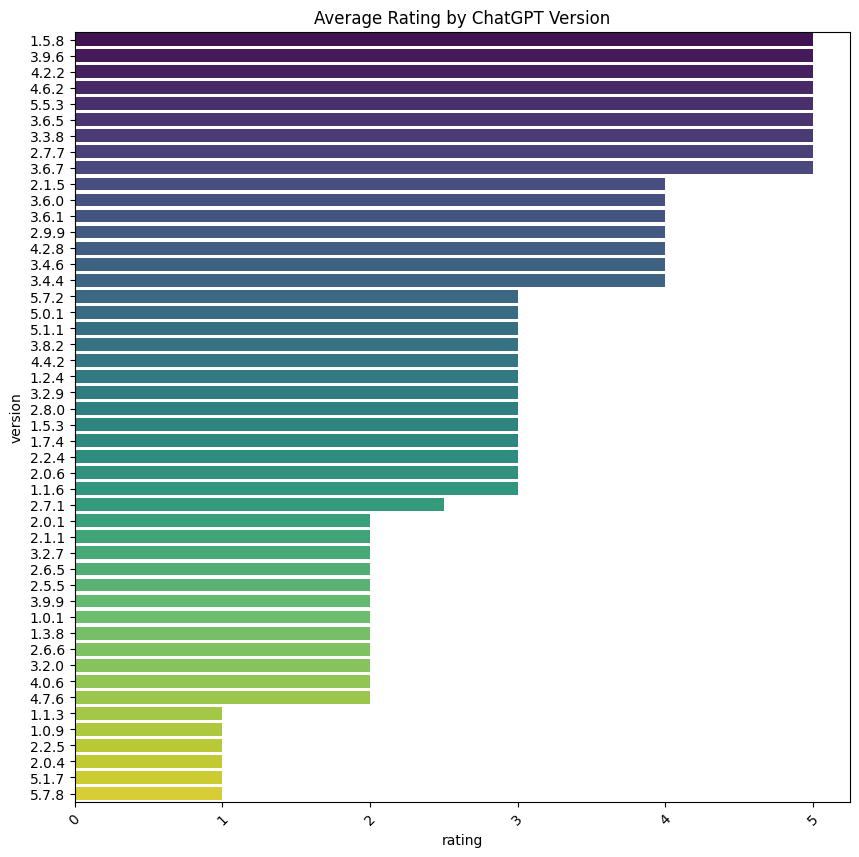

In [72]:
# 10. Ratings by ChatGPT Version
plt.figure(figsize=(10,10))
# Group by version and calculate average rating
version_avg = df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(y="version", x="rating", data=version_avg, palette="viridis")
plt.title("Average Rating by ChatGPT Version")
plt.xticks(rotation=45)
plt.show()